In [6]:
import pandas
import numpy

import seaborn

In [20]:


def load_data_stream(path):

    # the data stream is comma-separated values
    # but with multiple different event types
    # with a variable amount of actual data
    columns = ['event', 'tick'] + list(range(0,10))
    df = pandas.read_csv(path, header=None, names=columns, engine='python', delimiter=' ')
    
    return df

path = '../../sequence-piezo-taps-6.csv'
data = load_data_stream(path)
data = data.rename(columns={0: 'value'})
data

,event,tick,value,1,2,3,4,5,6,7,8,9
0,val,1052028,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,val,1052038,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,val,1052048,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,val,1052059,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,val,1052069,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1048,val,1062680,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049,val,1062690,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,val,1062701,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1051,val,1062711,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


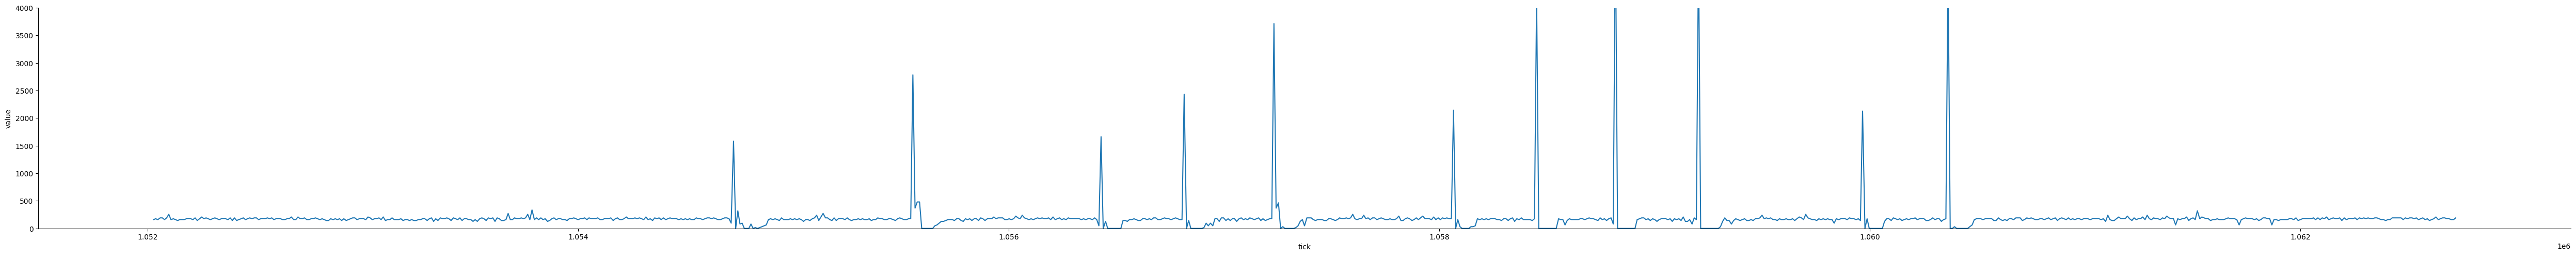

In [21]:

ax = seaborn.relplot(data=data, y='value', x='tick', aspect=10, height=5, kind='line')
ax.set(ylim=(0, 4000))

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


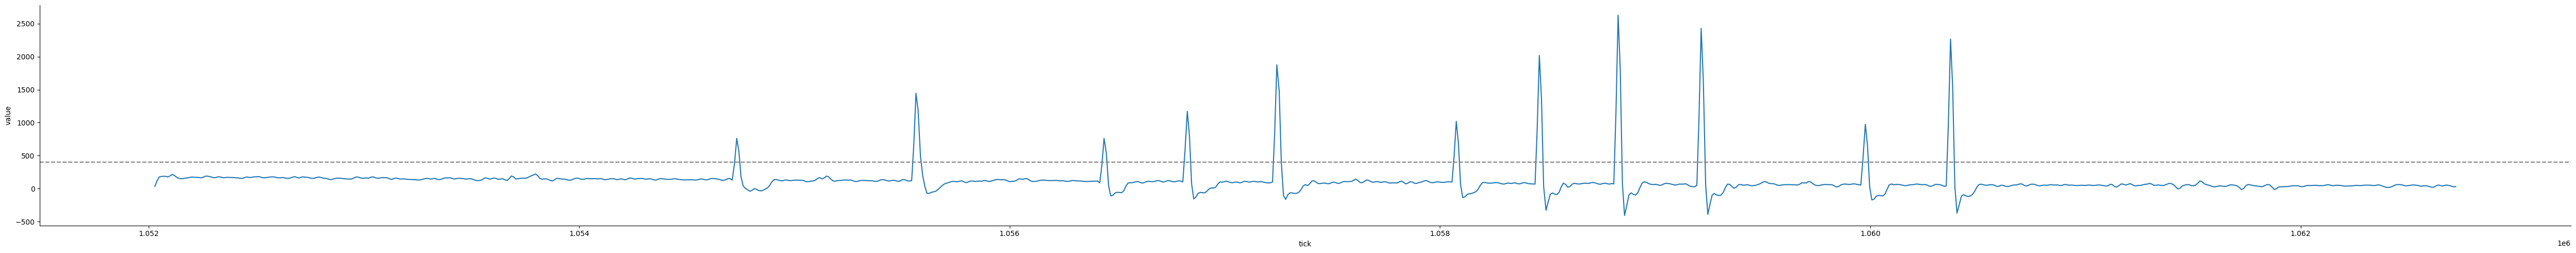

In [40]:

import scipy.signal

def design_filter(hp=0.01, lp=20, sr=25, order=2):

    coeff = scipy.signal.iirfilter(Wn=[hp, lp], N=order, fs=sr, btype='bandpass')
    return coeff

b, a = design_filter(sr=100)

filt = data.copy()
filt['value'] = scipy.signal.lfilter(b, a, data.value)

ax = seaborn.relplot(data=filt, y='value', x='tick', aspect=10, height=5, kind='line')
ax.refline(y=400)
